<a href="https://colab.research.google.com/github/NerakNightmare/ANN_AmericanSignLanguage/blob/main/signLanguajeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset Load

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/sign-language-img.zip \
    -O /tmp/sign-language-img.zip

--2024-02-16 02:57:43--  https://storage.googleapis.com/platzi-tf2/sign-language-img.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.207, 173.194.194.207, 173.194.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24265584 (23M) [application/zip]
Saving to: ‘/tmp/sign-language-img.zip’

/tmp/sign-language- 100%[===================>]  23.14M  94.2MB/s    in 0.2s    

2024-02-16 02:57:44 (94.2 MB/s) - ‘/tmp/sign-language-img.zip’ saved [24265584/24265584]



zip extract

In [ ]:
import os
import zipfile

local_zip = "/tmp/sign-language-img.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/sign-language-img")
zip_ref.close()

lib load

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = "/tmp/sign-language-img/Train"
test_dir = "/tmp/sign-language-img/Test"

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split= 0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale"
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [ ]:
classes = [char for char in string.ascii_uppercase if char != "J" if char != "Z"]
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

In [ ]:
def plotImages(images, labels):
    fig, axes = plt.subplots(1, len(images), figsize=(20,20))
    axes = axes.flatten()
    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img)
        ax.axis('off')
        #ax.set_title(label)
    plt.tight_layout()
    plt.show()

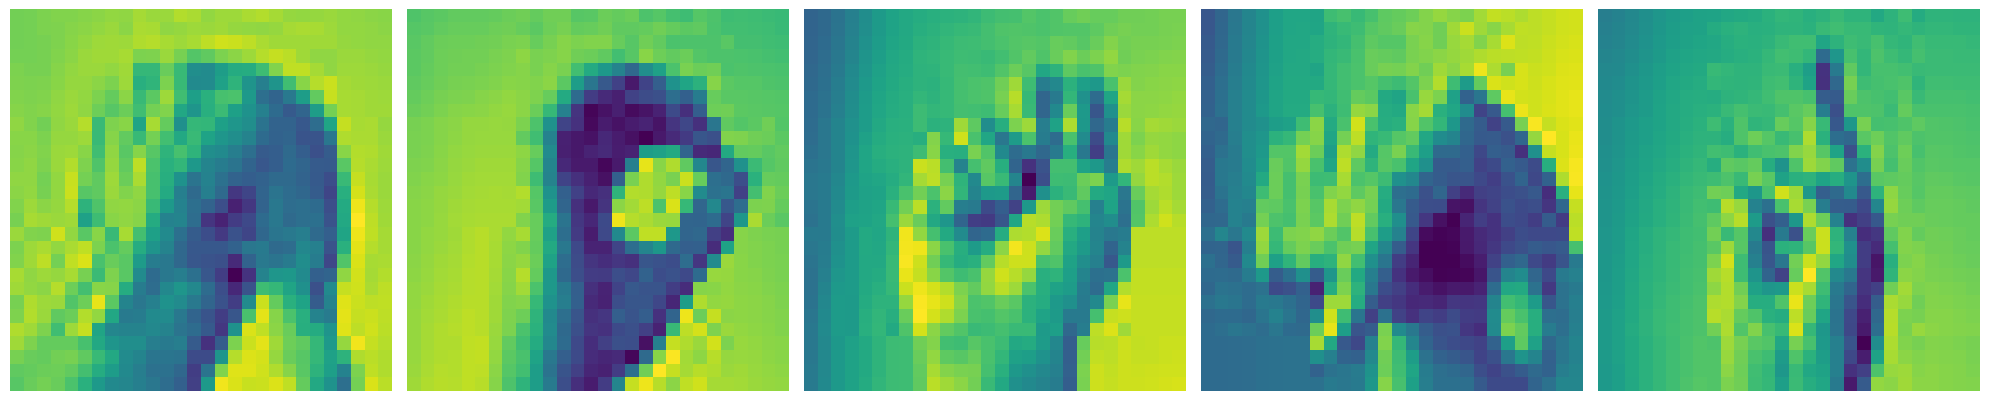

In [ ]:
# Muestra las imágenes y etiquetas
sample_training_images, sample_training_labels = next(train_generator)
plotImages(sample_training_images[:5], sample_training_labels[:5])

**model creation and implementation **

In [ ]:
model_base = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
              tf.keras.layers.Dense(128, activation = "relu"),
              tf.keras.layers.Dense(128, activation = "relu"),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

In [ ]:
model_base.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])

history = model_base.fit(
    train_generator,
    epochs= 20,
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 11s 38ms/step - loss: 2.2830 - accuracy: 0.3350 - val_loss: 1.7285 - val_accuracy: 0.4779
Epoch 2/20
215/215 [==============================] - 11s 52ms/step - loss: 1.2862 - accuracy: 0.6006 - val_loss: 1.3257 - val_accuracy: 0.5881
Epoch 3/20
215/215 [==============================] - 7s 33ms/step - loss: 0.9603 - accuracy: 0.7029 - val_loss: 1.3108 - val_accuracy: 0.5832
Epoch 4/20
215/215 [==============================] - 10s 47ms/step - loss: 0.7459 - accuracy: 0.7703 - val_loss: 1.0886 - val_accuracy: 0.6975
Epoch 5/20
215/215 [==============================] - 8s 35ms/step - loss: 0.5704 - accuracy: 0.8322 - val_loss: 1.0646 - val_accuracy: 0.6772
Epoch 6/20
215/215 [==============================] - 8s 36ms/step - loss: 0.4389 - accuracy: 0.8763 - val_loss: 1.0312 - val_accuracy: 0.6807
Epoch 7/20
215/215 [==============================] - 8s 35ms/step - loss: 0.3643 - accuracy: 0.8962 - val_loss: 1.0205 - val_accuracy: 0.7

In [ ]:
results = model_base.evaluate(test_generator)

57/57 [==============================] - 2s 33ms/step - loss: 1.2958 - accuracy: 0.7044


In [ ]:
def visualizacion_resultados(history):
  epochs = [i for i in range(20)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()


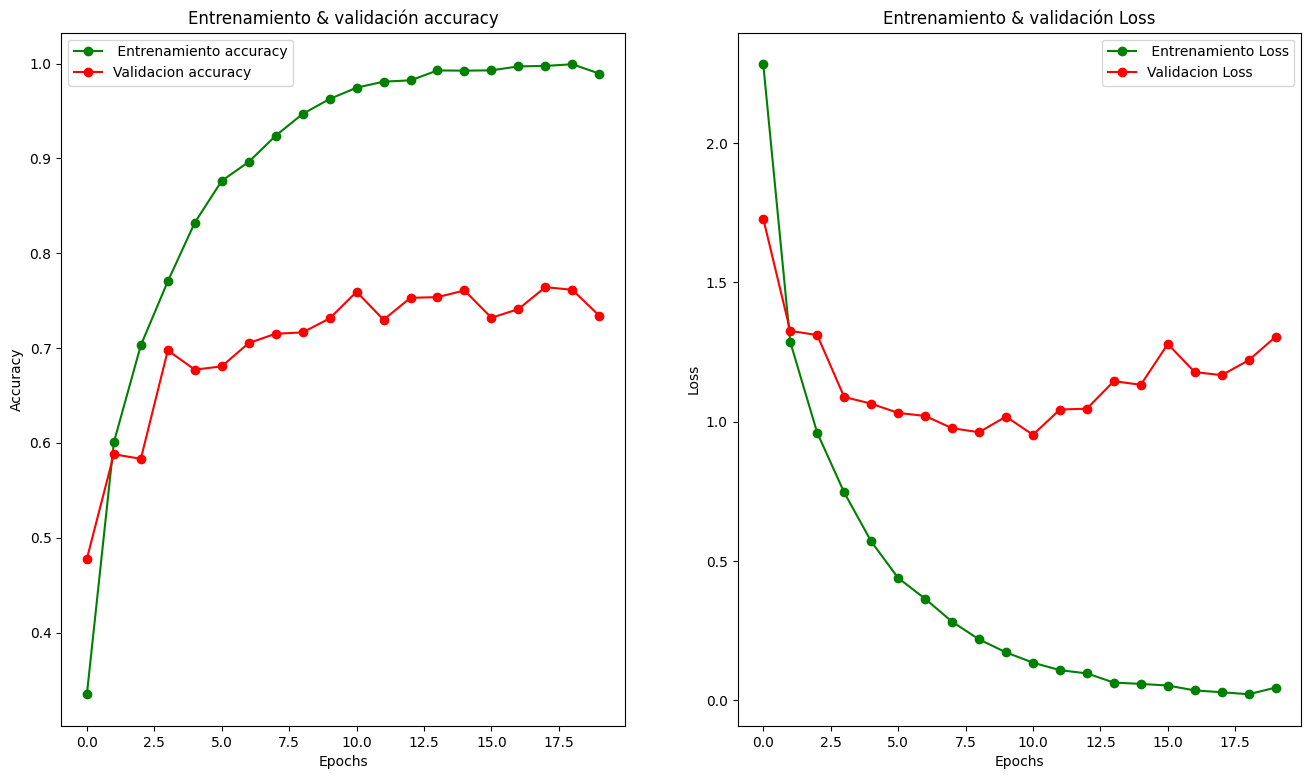

In [ ]:
visualizacion_resultados(history)

regularice model

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import L1L2

In [ ]:
model_optimizer = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_optimizer.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_optimizer = model_optimizer.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 10s 39ms/step - loss: 2.5153 - accuracy: 0.2346 - val_loss: 1.8031 - val_accuracy: 0.5004
Epoch 2/20
215/215 [==============================] - 8s 35ms/step - loss: 1.5624 - accuracy: 0.4884 - val_loss: 1.3322 - val_accuracy: 0.6112
Epoch 3/20
215/215 [==============================] - 7s 33ms/step - loss: 1.1858 - accuracy: 0.6022 - val_loss: 1.1941 - val_accuracy: 0.6175
Epoch 4/20
215/215 [==============================] - 9s 40ms/step - loss: 0.9551 - accuracy: 0.6807 - val_loss: 1.0103 - val_accuracy: 0.6912
Epoch 5/20
215/215 [==============================] - 8s 36ms/step - loss: 0.8075 - accuracy: 0.7290 - val_loss: 0.9518 - val_accuracy: 0.6947
Epoch 6/20
215/215 [==============================] - 7s 34ms/step - loss: 0.7034 - accuracy: 0.7606 - val_loss: 0.9076 - val_accuracy: 0.7116
Epoch 7/20
215/215 [==============================] - 7s 32ms/step - loss: 0.6065 - accuracy: 0.7980 - val_loss: 0.8612 - val_accuracy: 0.729

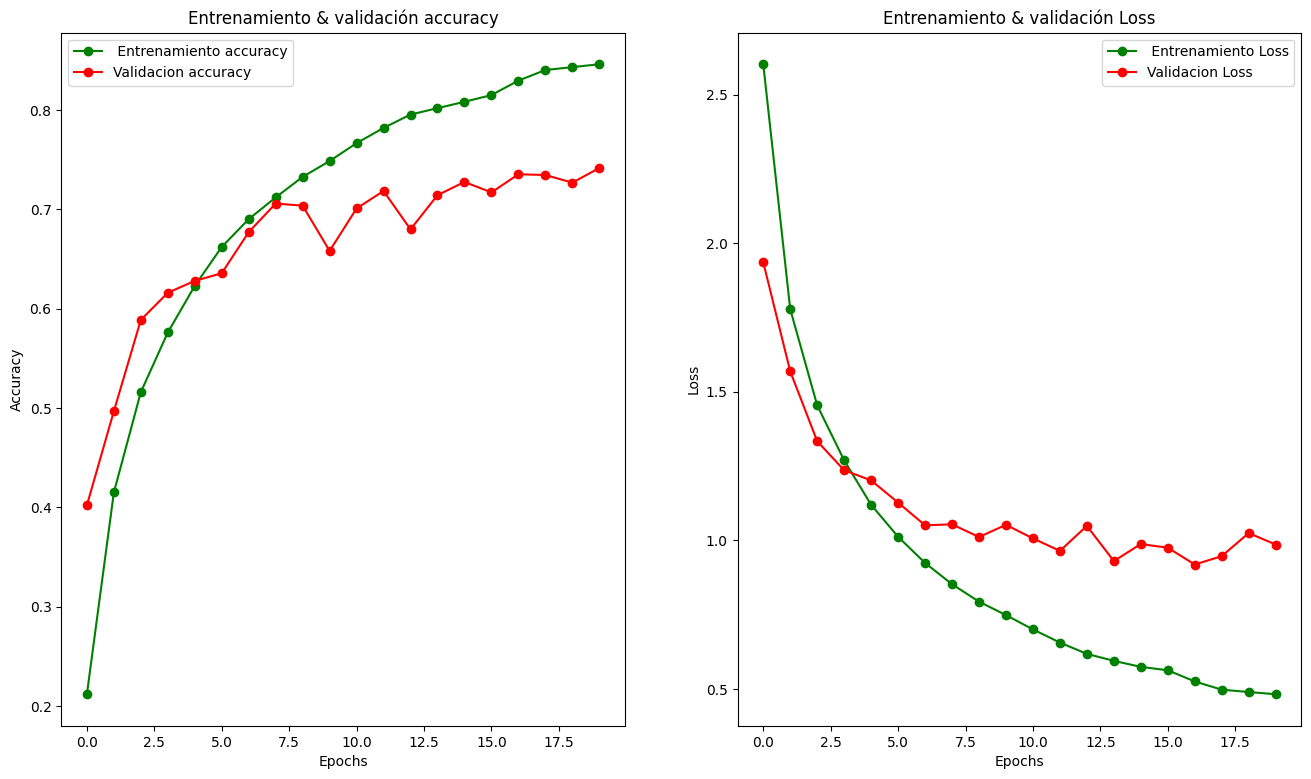

In [ ]:
visualizacion_resultados(history_optimizer)

**convolutional network**

In [ ]:
model_convolutional = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75,(3,3), activation = 'relu', input_shape = (28, 28, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_convolutional.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_convolutional = model_convolutional.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 12s 43ms/step - loss: 1.5637 - accuracy: 0.5322 - val_loss: 0.7398 - val_accuracy: 0.7593
Epoch 2/20
215/215 [==============================] - 7s 34ms/step - loss: 0.2964 - accuracy: 0.9180 - val_loss: 0.5776 - val_accuracy: 0.8204
Epoch 3/20
215/215 [==============================] - 8s 37ms/step - loss: 0.1102 - accuracy: 0.9796 - val_loss: 0.5940 - val_accuracy: 0.8344
Epoch 4/20
215/215 [==============================] - 8s 37ms/step - loss: 0.0701 - accuracy: 0.9887 - val_loss: 0.6014 - val_accuracy: 0.8407
Epoch 5/20
215/215 [==============================] - 8s 38ms/step - loss: 0.0519 - accuracy: 0.9933 - val_loss: 0.6202 - val_accuracy: 0.8547
Epoch 6/20
215/215 [==============================] - 7s 35ms/step - loss: 0.0445 - accuracy: 0.9948 - val_loss: 0.6614 - val_accuracy: 0.8519
Epoch 7/20
215/215 [==============================] - 8s 37ms/step - loss: 0.0381 - accuracy: 0.9968 - val_loss: 0.6289 - val_accuracy: 0.857

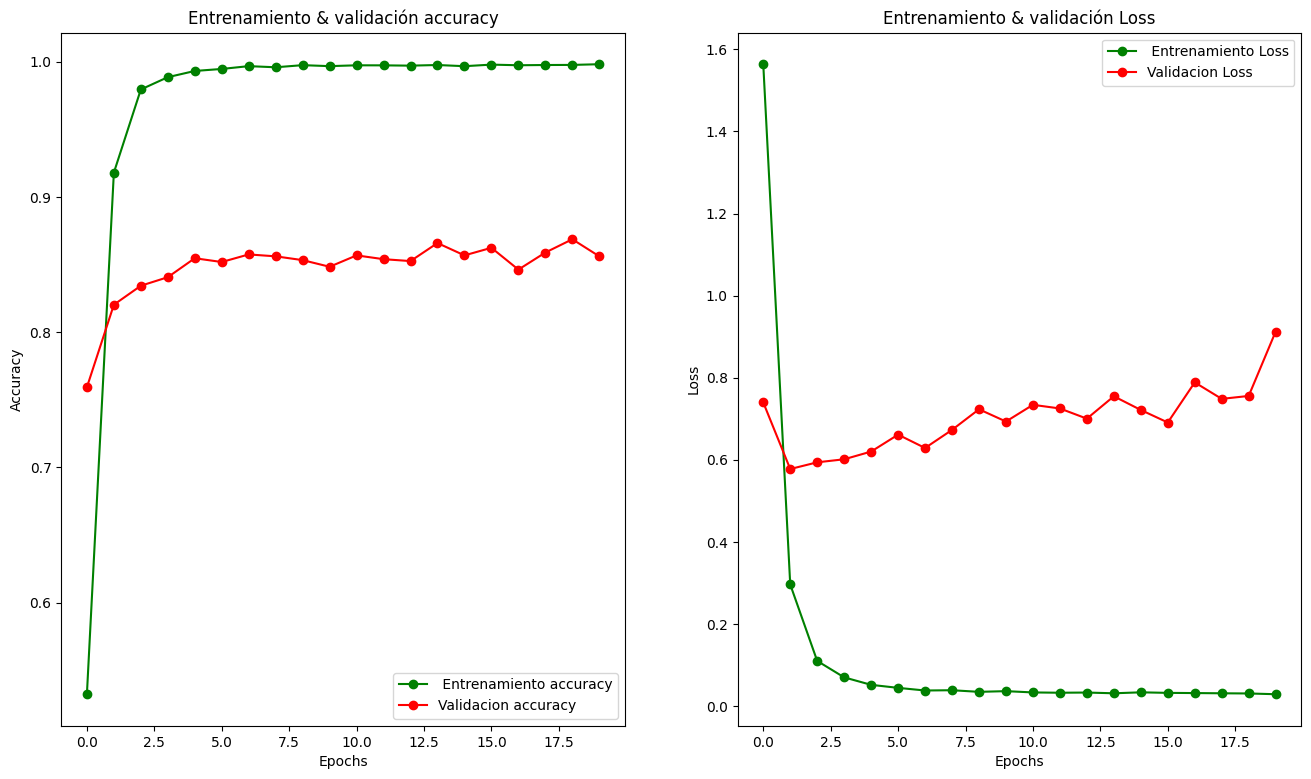

In [ ]:
visualizacion_resultados(history_convolutional)

**CALLBACK MODEL**

In [ ]:
model_callback = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75,(3,3), activation = 'relu', input_shape = (28, 28, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])
model_callback.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])


**Callback Creation**

In [ ]:
from tensorflow.keras.callbacks import Callback

In [ ]:
class TrainingCallback(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get("accuracy") > 0.95):
      print("Model training succesfull")
      self.model.stop_training = True

In [ ]:
callback = TrainingCallback()

history_callback = model_callback.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback],
    validation_data = validation_generator
)

NameError: name 'TrainingCallback' is not defined

**model function**

In [ ]:
def get_model():
  model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(75,(3,3), activation = 'relu', input_shape = (28, 28, 1)),
                tf.keras.layers.MaxPool2D((2,2)),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(len(classes), activation = "softmax")
  ])
  return model

callback early stopping
this callaback, check if the model training is going well, in other case, stop the model

In [ ]:
model_early = get_model()
model_early.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
callback_early = tf.keras.callbacks.EarlyStopping()

In [ ]:
callback = TrainingCallback()
history_early = model_early.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback_early, callback],
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 55s 256ms/step - loss: 0.0705 - accuracy: 0.9885 - val_loss: 0.6639 - val_accuracy: 0.8365


**Keras Tuner**

In [ ]:
!pip install -q -U keras-tuner

import kerastuner as kt
from tensorflow import keras

<ipython-input-31-27daccd17e71>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
def model_constructor(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape = (28,28, 1)))
  model.add(tf.keras.layers.MaxPool2D((2,2)))
  model.add(tf.keras.layers.Flatten())

  hp_units = hp.Int("units", min_value = 512, max_value = 512, step = 32)
  model.add(tf.keras.layers.Dense(units = hp_units, activation = "relu", kernel_regularizer = regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(len(classes), activation = "softmax"))

  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate= hp_learning_rate), loss = "categorical_crossentropy", metrics = ["accuracy"])

  return model


In [ ]:
tuner = kt.Hyperband(
    model_constructor,
    objective = "val_Accuracy",
    max_epochs= 20,
    factor = 3,
    directory = "models/",
    project_name = "sing-language-detection"
)

In [ ]:
tuner.search(train_generator, epochs = 20, validation_data = validation_generator)

best_hps = tuner.get_best_hyperparameters(num_trials= 1)[0]

In [ ]:
print(f"the best HP: units {best_hps.get('units')}, learning rate {best_hps.get('learning_rate')}")
